<a href="https://colab.research.google.com/github/SirilukLee/Visualization-with-Python/blob/main/My_Visualization_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Matplotlib Practice**
ref: [matplotlib for Data Visualization](https://www.analyticsvidhya.com/blog/2020/02/beginner-guide-matplotlib-data-visualization-exploration-python/)
### **Food Demand Dataset**

The data set is related to a meal delivery company which operates in multiple cities. They have various fulfilment centers in these cities for dispatching meal orders to their customers.

The dataset consists of historical data of demand for a product-center combination for weeks 1 to 145.

id: Unique ID

week: Week No

center_id: Unique ID for fulfillment center 

meal_id: Unique ID for Meal

checkout_price: Final price including discount, taxes & delivery charges 

base_price: Base price of the meal

emailer_for_promotion: Emailer sent for promotion of meal

homepage_featured: Meal featured at homepage 

num_orders: Orders Count

city_code: Unique code for city

region_code: Unique code for region

center_type: Anonymized center type

op_area: Area of operation (in km^2)

category: Type of meal (beverages/snacks/soups….)

cuisine: Meal cuisine (Indian/Italian/…)



In [1]:
%matplotlib inline
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd

In [2]:
df_meal = pd.read_csv('https://raw.githubusercontent.com/tnadkarni/DFC/master/meal_info.csv') 
df_center = pd.read_csv('https://raw.githubusercontent.com/tnadkarni/DFC/master/fulfilment_center_info.csv')
df_food = pd.read_csv('https://raw.githubusercontent.com/tnadkarni/DFC/master/train.csv')
df = pd.merge(df_food,df_center,on='center_id') 
df = pd.merge(df,df_meal,on='meal_id')  

In [3]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

**1.Bar Graph using matplotlib**

First, we want to find the most popular food item that customers have bought from the company.

using the Pandas `pivot_table` function to find the total number of orders for each category of the food item:

In [5]:
# YOUR CODE HERE
cat_orders = pd.pivot_table(data=df,values='num_orders',index='category',aggfunc=np.sum)
cat_orders

,num_orders
category,
Beverages,40480525
Biryani,631848
Desert,1940754
Extras,3984979
Fish,871959
Other Snacks,4766293
Pasta,1637744
Pizza,7383720
Rice Bowl,20874063


Next, Try to visualize this using a bar graph.

Bar graphs are best used when we need to compare the quantity of categorical values within the same category.

Text(0, 0.5, 'Order number')

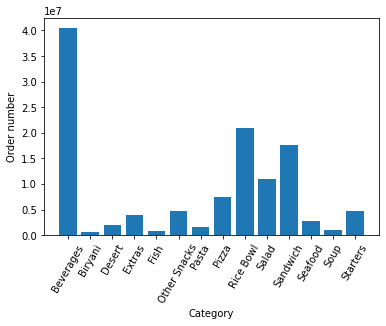

In [6]:
# YOUR CODE HERE
x = cat_orders.index
y = cat_orders['num_orders']
plt.bar(x, y)
plt.xticks(rotation=60) #เป็นองศา
plt.xlabel('Category')
plt.ylabel('Order number')



While analyzing the plot, we can see that Beverages were the most popular food item sold by the company. Wait, was it because they were sold with almost all the meals? Was Rice Bowl the most popular food item?

Let’s divide the total food item order by the number of unique meals it is present in.

In [7]:
df.groupby('category')['meal_id'].nunique()
cat_orders['num_meals'] = df.groupby('category')['meal_id'].nunique()
cat_orders

,num_orders,num_meals
category,,
Beverages,40480525,12
Biryani,631848,3
Desert,1940754,3
Extras,3984979,3
Fish,871959,3
Other Snacks,4766293,3
Pasta,1637744,3
Pizza,7383720,3
Rice Bowl,20874063,3


Text(0, 0.5, 'No.of meals')

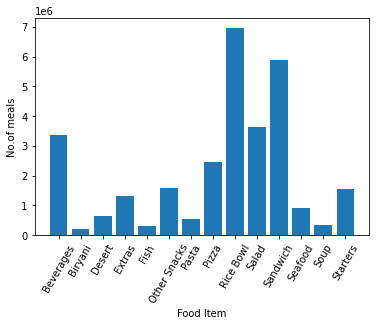

In [8]:
#dictionary for meals per food item
x = cat_orders.index
y = cat_orders['num_orders']/ cat_orders['num_meals']

#bar plot 
plt.bar(x, y)

#adjust xticks
plt.xticks(rotation=60)

#label x-axis
plt.xlabel('Food Item')

#label y-axis
plt.ylabel('No.of meals')

#label the plot


#display plot


Yes, our hypothesis was correct! Rice Bowl was indeed the most popular food item sold by the company.

Bar graphs should not be used for continuous values.

**2.Pie Chart using matplotlib**

Let us now see the ratio of orders from each cuisine.

A pie chart is suitable to show the proportional distribution of items within the same category.

In [9]:
total_order_cuisine = df['num_orders'].sum()
total_order_cuisine

119557485

In [10]:
cuisine_share = df.groupby('cuisine')[['num_orders']].sum()
cuisine_share['ratio'] = cuisine_share['num_orders']/total_order_cuisine
cuisine_share

,num_orders,ratio
cuisine,,
Continental,16914439,0.141475
Indian,25792544,0.215733
Italian,44172832,0.369469
Thai,32677670,0.273322


Text(0.5, 1.0, 'Cuisine Pie Chart')

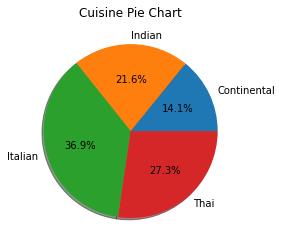

In [11]:
#pie plot 
labels = cuisine_share.index
sizes = cuisine_share['num_orders']
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True)

#label the plot 
plt.title('Cuisine Pie Chart')


**3.Box Plot using matplotlib**

Since we are discussing cuisine, let’s check out which one is the most expensive cuisine! For this, using a Box Plot.

Box plot gives statistical information about the distribution of numeric data divided into different groups. It is useful for detecting outliers within each group.

*   The lower, middle and upper part of the box represents the 25th, 50th, and 75th percentile values respectively 
*   The top whisker represents Q3+1.5*IQR
*   The bottom whisker represents Q1-1.5*IQR
*   Outliers are shown as scatter points
*   Shows skewness in the data

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


{'boxes': [<matplotlib.lines.Line2D at 0x7f2824bf2bd0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f2824bfbc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2824c03c90>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2824c03750>,
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2824bfb1d0>,
  <matplotlib.lines.Line2D at 0x7f2824bb7890>]}

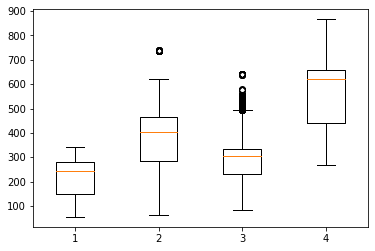

In [12]:
data1 = df[df['cuisine']=='Thai'][['base_price']]
data2 = df[df['cuisine']=='Indian'][['base_price']]
data3= df[df['cuisine']=='Italian'][['base_price']]
data4 = df[df['cuisine']=='Continental'][['base_price']]
 
data = [data1, data2, data3, data4]
plt.boxplot(data)

In [13]:
#subplot
cuisines = df['cuisine'].unique()


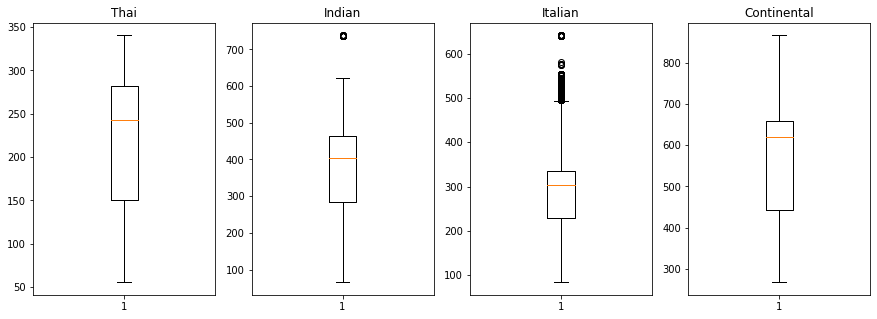

In [14]:
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15,5))

for i , ax in enumerate(axs): #enumerateคือเอาทั้งค่าและindex
  data = df[df['cuisine']==cuisines[i]]['base_price']
  ax.boxplot(data)
  ax.set_title(cuisines[i])
  

Continental cuisine was the most expensive cuisine served by the company! Even its median price is higher than the maximum price of all the cuisines.

Box plot does not show the distribution of data points within each group.

**4.Histogram using matplotlib**

On the topic of prices, did we forget to inspect the base price and checkout price? Don’t worry, we will do that using a histogram.

A histogram shows the distribution of numeric data through a continuous interval by segmenting data into different bins. Useful for inspecting skewness in the data.

Since base_price is a continuous variable, we will inspect its range in different distinct orders using a histogram. We can do this using plt.hist().

But the confusing part is what should be the number of bins? By default, it is 10. However, there is no correct answer and you can vary it according to your dataset to best visualize it.

In [15]:
#plotting histogram 


#x and y-axis labels 


#plot title 


#display the plot 


**5.Line Plot and Subplots using matplotlib**

A line plot is useful for visualizing the trend in a numerical value over a continuous time interval.

How are the weekly and monthly sales of the company varying? This is a critical business question that makes or breaks the marketing strategy.

Before exploring that, create two lists for storing the week-wise and month-wise revenue of the company:

In [16]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai


In [17]:
df.shape

(456548, 15)

In [18]:
df['revenue'] = df['checkout_price'] * df['num_orders']


In [19]:
from datetime import datetime
from dateutil.relativedelta import relativedelta
df['date'] =  df['week'].apply(lambda x: datetime(2015,1,1)+relativedelta(weeks=x))

In [20]:
df[['date','week']].head()

,date,week
0,2015-01-08,1
1,2015-01-15,2
2,2015-01-22,3
3,2015-01-29,4
4,2015-02-05,5


In [21]:
df.set_index('date', inplace=True)

In [22]:
week_revenue =df['revenue'].resample('W').sum()

In [23]:
month_revenue =df['revenue'].resample('M').sum()

Compare the revenue of the company in every week as well as in every month using two line-plots drawn side by side. For this, using the plt.subplots() function.

Matplotlib subplots makes it easy to view and compare different plots in the same figure.

To understand how this function works, you need to know what Figure, Axes, and Axis are in a matplotlib plot.

Figure is the outermost container for the Matplotlib plot(s). There can a single or multiple plots, called Axes, within a Figure. Each of these Axes contains the x and y-axis known as the Axis.

The plt.subplots() figure returns the figure and axes. You can provide as an input to the function how you want to display the axes within the figure. These will be adjusted using the nrows and ncols parameters. You can even adjust the size of the figure using the figsize parameter.

Axes are returned as a list. To plot for specific axes, you can access them as a list object. The rest of the plotting is done the same way as simple plots:

In [24]:
df.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,revenue
date,,,,,,,,,,,,,,,,
2015-01-08,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
2015-01-15,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,43873.09
2015-01-22,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,12760.32
2015-01-29,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,22145.18
2015-02-05,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,31497.50


In [25]:
df['op_area'].unique()

array([2. , 3.6, 3.7, 5.3, 3.8, 6.7, 5.6, 3.9, 3.4, 5. , 2.8, 2.4, 4.8,
       4. , 4.6, 4.4, 4.5, 4.1, 0.9, 4.2, 2.9, 2.7, 4.7, 3.2, 3. , 7. ,
       1.9, 3.5, 6.3, 5.1])

Text(0, 0.5, 'month')

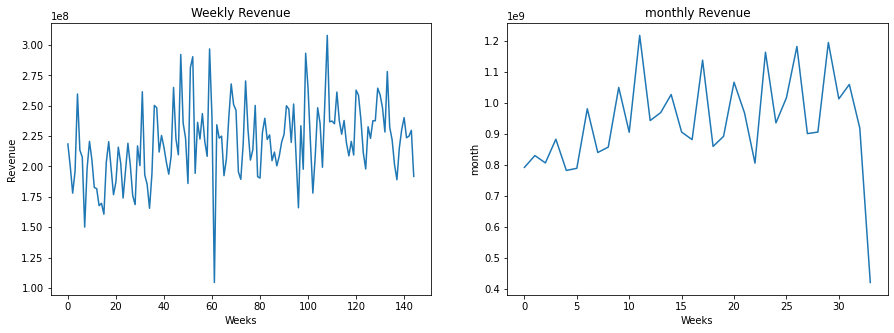

In [26]:
#subplots returns a Figure and an Axes object 


#manipulating the first Axes 


#manipulating the second Axes 
 

#display the plot 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
axs[0].plot(np.arange(len(week_revenue)), week_revenue)
axs[0].set_title('Weekly Revenue')
axs[0].set_xlabel('Weeks')
axs[0].set_ylabel('Revenue')

axs[1].plot(np.arange(len(month_revenue)), month_revenue)
axs[1].set_title('monthly Revenue')
axs[1].set_xlabel('Weeks')
axs[1].set_ylabel('month')


**6.Scatter Plot using matplotlib**

Finally, try to analyze whether the center type had any effect on the number of orders from different center types. I will do this by comparing a scatter plot, a boxplot and a bar graph in the same figure.

We have already seen the use of boxplots and bar graphs, but scatter plots have their own advantages.

Scatter plots are useful for showing the relationship between two variables. Any correlation between variables or outliers in the data can be easily spotted using scatter plots.

In [45]:
df.head()


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine,revenue
date,,,,,,,,,,,,,,,,
2015-01-08,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai,24218.91
2015-01-15,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai,43873.09
2015-01-22,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai,12760.32
2015-01-29,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai,22145.18
2015-02-05,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai,31497.50


In [30]:
op_area_orders =df.groupby('op_area')['num_orders'].sum()
op_area_orders

op_area
0.9      425160
1.9      497338
2.0     1521501
2.4      637527
2.7     3058120
2.8     4656558
2.9      898613
3.0     2062748
3.2     1218319
3.4     3478065
3.5     1812167
3.6     4596156
3.7     2797300
3.8     7977964
3.9    10738365
4.0    11780398
4.1     5202521
4.2     3116118
4.4     8367833
4.5     8043504
4.6     1833427
4.7     1739081
4.8     5237062
5.0     1906535
5.1     5641494
5.3     1628964
5.6     3125835
6.3     3381018
6.7     4296545
7.0     7881249
Name: num_orders, dtype: int64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


<BarContainer object of 3 artists>

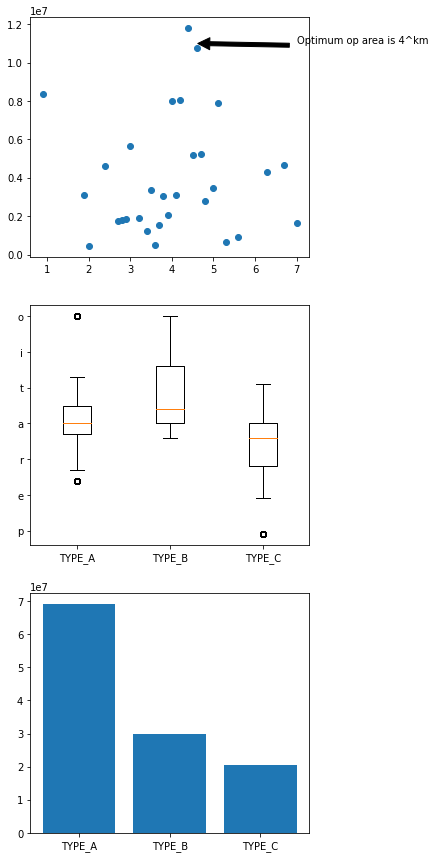

In [53]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(5,15))

axs[0].scatter(df['op_area'].unique(), op_area_orders)
axs[0].annotate(
                'Optimum op area is 4^km',
                 xy=(4.5,1.1e7),
                xytext=(7,1.1e7),
                arrowprops={'facecolor':'black','shrink':0.05})

center_type_name = ['TYPE_A','TYPE_B','TYPE_C'] 
data_a = df[df['center_type']==center_type_name[0]]['op_area'] 
data_b = df[df['center_type']==center_type_name[1]]['op_area']     
data_c = df[df['center_type']==center_type_name[2]]['op_area']         
data = [data_a, data_b, data_c]
axs[1].boxplot(data)
axs[1].set_xticklabels(center_type_name)
axs[1].set_yticklabels('Operation Area')

data = df.groupby('center_type')['num_orders'].sum()
axs[2].bar(center_type_name, data) 


The scatter plot makes it instantly visible that the optimum operation area of a center is 4 km sq. The boxplot shows that the TYPE_A center type had the most number of optimum size centers because of a compact box with a median around 4 km sq. Because of this, they had more orders placed by customers than any other center type.

# **Seaborn Exercises**

Time to practice your new seaborn skills! Try to create the plots below (don't worry about color schemes, just the plot itself.)

### **The Data**
We will be working with a famous titanic data set for these exercises. Later on in the Python for Machine Learning section of the course, we will revisit this data and focus on the visualization of the data with seaborn:

In [54]:
import seaborn as sns

In [55]:
sns.set_style('whitegrid')

In [56]:
titanic = sns.load_dataset('titanic')

In [59]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


**Exercises**

**1.Assign `fare` and `age` to create a scatterplot with marginal histograms**

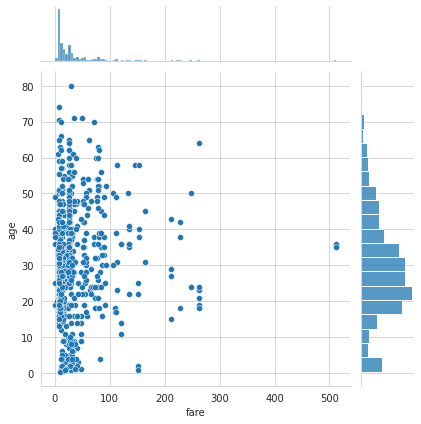

In [60]:
# YOUR CODE HERE
sns.jointplot(x='fare',y='age', data=titanic)

**2.Assign `fare` to create histogram** *(bins = 30)* 

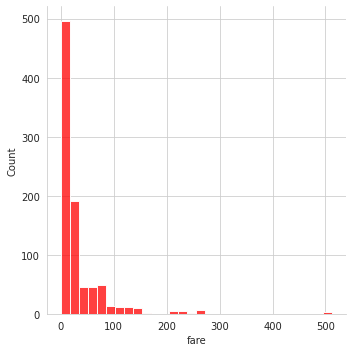

In [61]:
# YOUR CODE HERE
sns.displot(titanic['fare'], kind='hist', color='red', bins=30)

**3.Assign `class` and `age` to create boxplot**

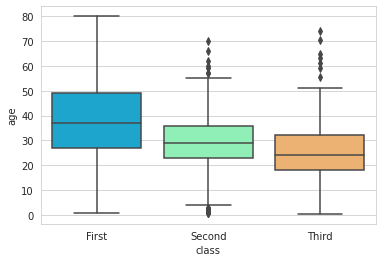

In [63]:
# YOUR CODE HERE
sns.boxplot(x='class', y = 'age', data= titanic, palette='rainbow')

**4.Assign `class` and `age` to create swarmplot**

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 15.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


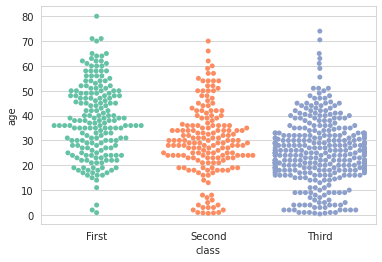

In [64]:
# YOUR CODE HERE
sns.swarmplot(x='class', y='age', data=titanic, palette='Set2')

**5.Assign `sex` to create bar chart**

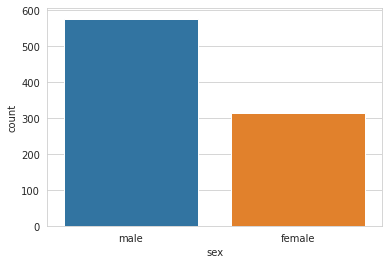

In [65]:
# YOUR CODE HERE
sns.countplot(x='sex', data=titanic)

**6.Plot heatmap correlation between variable in Titanic dataset**

In [66]:
titanic.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


Text(0.5, 1.0, 'titanic.corr()')

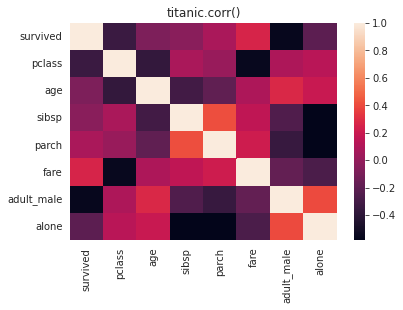

In [67]:
# YOUR CODE HERE
sns.heatmap(titanic.corr())
plt.title('titanic.corr()')

7.Assign `sex` (male, female) to create `age` histogram 

**[HINT]** use  [sns.FacetGrid()](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html)

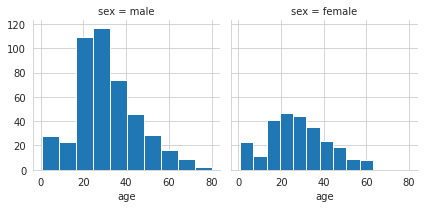

In [68]:
# YOUR CODE HERE
g= sns.FacetGrid(titanic, col='sex')
g = g.map(plt.hist,'age')

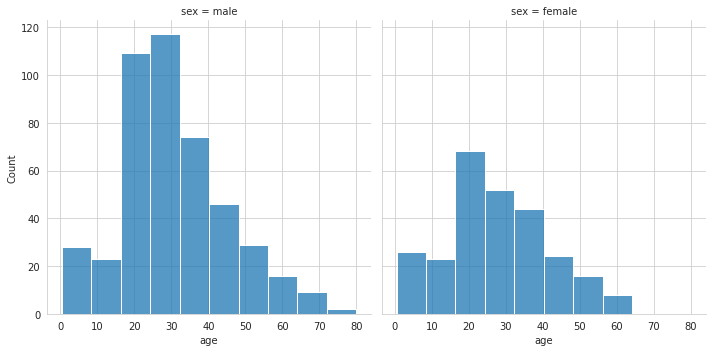

In [69]:
#or use displot
sns.displot(titanic, x='age', col='sex', kind='hist', bins=10)

## **Great Job!**